Objective: Predicting Bitcoin daily price movement 

## Bitcoin Price data from 13-01-2017 to 12-01-2022 

5 years of data

imports

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [26]:
api_key='a58413697e8263de9c95cab92049ea3f'
symbol='BTCUSD'
query=f'https://financialmodelingprep.com/api/v3/historical-price-full/{symbol}?apikey={api_key}'
response=requests.get(query)
df = pd.DataFrame(response.json()['historical'])
df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2022-01-12,42776.830200,42942.709400,42588.767200,42839.807600,42839.807600,2.654798e+10,2.654798e+10,62.97740,0.147,42790.42807,"January 12, 22",0.00147
1,2022-01-11,41861.042700,42148.080100,41703.983200,42148.080100,42148.080100,3.467735e+10,3.467735e+10,287.03740,0.686,42000.04780,"January 11, 22",0.00686
2,2022-01-10,41932.756900,42253.057500,41772.873600,41919.103900,41919.103900,2.200912e+10,2.200912e+10,-13.65300,-0.033,41981.67833,"January 10, 22",-0.00033
3,2022-01-09,41808.563900,42710.280700,41473.902200,41963.416500,41963.416500,2.250029e+10,2.250029e+10,154.85260,0.370,42049.19980,"January 09, 22",0.00370
4,2022-01-08,41578.373000,42270.547300,40465.070800,41862.367700,41862.367700,2.811234e+10,2.811234e+10,283.99470,0.683,41532.66193,"January 08, 22",0.00683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-01-17,830.945984,910.560974,830.796021,907.937988,907.937988,1.550950e+08,1.550950e+08,76.99200,9.266,883.09833,"January 17, 17",0.09266
1822,2017-01-16,821.783020,834.530029,820.270996,831.533997,831.533997,8.275520e+07,8.275520e+07,9.75098,1.187,828.77834,"January 16, 17",0.01187
1823,2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,7.101360e+07,7.101360e+07,3.65595,0.447,819.32532,"January 15, 17",0.00447
1824,2017-01-14,825.142029,835.085022,812.455994,818.411987,818.411987,9.306330e+07,9.306330e+07,-6.73004,-0.816,821.98433,"January 14, 17",-0.00816


In [27]:
df['date']= pd.to_datetime(df['date'])

In [28]:
df.set_index('date', inplace = True)

In [29]:
data = df

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

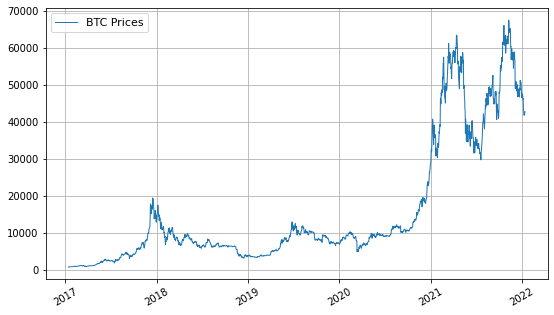

In [30]:
plt.figure(figsize=(9,5))
plt.plot(data['close'],lw=1, label='BTC Prices')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)

## Sentiment data 

### Twitter data

In [38]:
tweet_content_df = pd.read_csv('cryptocurrency_trading/data/tweet_content_010921.csv')

In [35]:
tweet_content_df.head()

,Unnamed: 0,id,text,start,end
0,0,1425623064121724929,RT @WClementeIII: 76.8% of Bitcoin's money sup...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
1,1,1425622402176675842,RT @1MillionTokens: 🥰1000 #1MT #Giveaway ( wor...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
2,2,1425622403439267849,"RT @gladstein: 1/ My essay ""Inside Cuba's Bitc...",2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
3,3,1425622403695058947,RT @AirdropDet: 🔍 New #Airdrop: META 1 Coin\n\...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z
4,4,1425622404194136066,RT @RewardHunters: Want to know about The Batt...,2018-01-01 00:00:00+00:00,2018-01-02T00:00:00Z


Example of tweet

In [37]:
tweet_content_df['text'][0]

"RT @WClementeIII: 76.8% of Bitcoin's money supply is held by strong hands.\n\nThroughout the asset's speculative history, a larger % of suppl…"

Number of tweet containing the keyword 'Bitcoin' per day

In [39]:
tweet_count_df = pd.read_csv('cryptocurrency_trading/data/tweet_count_010921.csv')

In [48]:
tweet_count_df.head()

,Unnamed: 0,end,start,tweet_count
0,0,2018-01-02T00:00:00.000Z,2018-01-01T00:00:00.000Z,90414
1,1,2018-01-03T00:00:00.000Z,2018-01-02T00:00:00.000Z,125905
2,2,2018-01-04T00:00:00.000Z,2018-01-03T00:00:00.000Z,134825
3,3,2018-01-05T00:00:00.000Z,2018-01-04T00:00:00.000Z,126106
4,4,2018-01-06T00:00:00.000Z,2018-01-05T00:00:00.000Z,115883


In [56]:
tweet_count_df.columns

Index(['Unnamed: 0', 'end', 'start', 'tweet_count'], dtype='object')

In [60]:
tweet_count_df =  tweet_count_df.drop(['start','Unnamed: 0'], axis =1)

In [58]:
tweet_count_df['end'] = pd.to_datetime(tweet_count_df['end'])

In [61]:
tweet_count_df

,end,tweet_count
0,2018-01-02 00:00:00+00:00,90414
1,2018-01-03 00:00:00+00:00,125905
2,2018-01-04 00:00:00+00:00,134825
3,2018-01-05 00:00:00+00:00,126106
4,2018-01-06 00:00:00+00:00,115883
...,...,...
1291,2021-08-29 00:00:00+00:00,275021
1292,2021-08-30 00:00:00+00:00,321682
1293,2021-08-31 00:00:00+00:00,305249
1294,2021-09-01 00:00:00+00:00,296186


In [64]:
tweet_count_df.set_index('end', inplace=True)

Text(0.5, 1.0, 'Correlation between number of tweets and bitcoin price')

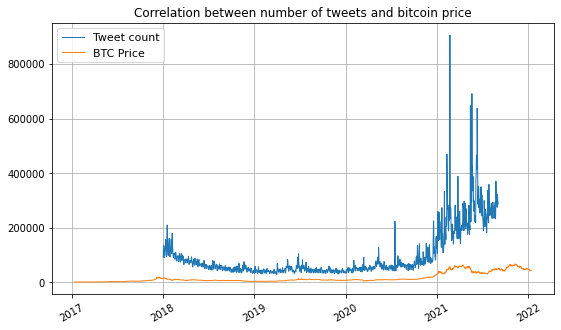

In [72]:
plt.figure(figsize=(9,5))
plt.plot(tweet_count_df['tweet_count'],lw=1, label='Tweet count')
plt.plot(data['close'],lw=1, label='BTC Price')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.title('Correlation between number of tweets and bitcoin price')

###  Reddit data

In [74]:
reddit_df = pd.read_csv('cryptocurrency_trading/data/final_reddit_data.csv')

In [75]:
reddit_df

,Unnamed: 0,date,real_score,post_per_day
0,0,2018-01-01,0.191187,464
1,1,2018-01-02,0.476037,594
2,2,2018-01-03,0.689065,620
3,3,2018-01-04,-0.144155,629
4,4,2018-01-05,0.197948,686
...,...,...,...,...
1236,1236,2021-08-27,0.472290,269
1237,1237,2021-08-28,0.417047,219
1238,1238,2021-08-29,0.835773,199
1239,1239,2021-08-30,0.722232,232


In [76]:
reddit_df = reddit_content_df.drop(['Unnamed: 0'], axis =1)

In [79]:
reddit_df['date'] = pd.to_datetime(reddit_df['date'])

In [81]:
reddit_df.head()

,date,real_score,post_per_day
0,2018-01-01,0.191187,464
1,2018-01-02,0.476037,594
2,2018-01-03,0.689065,620
3,2018-01-04,-0.144155,629
4,2018-01-05,0.197948,686


In [82]:
reddit_df.tail()

,date,real_score,post_per_day
1236,2021-08-27,0.472290,269
1237,2021-08-28,0.417047,219
1238,2021-08-29,0.835773,199
1239,2021-08-30,0.722232,232
1240,2021-08-31,0.628596,259


In [84]:
reddit_df.set_index('date', inplace=True)

Text(0.5, 1.0, 'Correlation between number of tweets and bitcoin price')

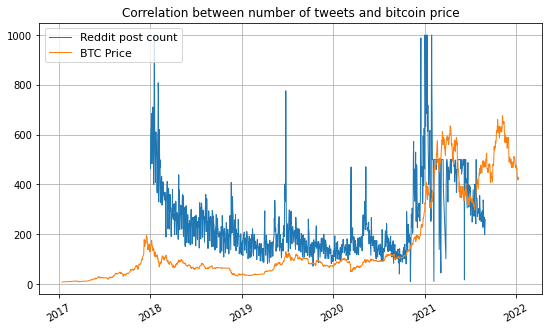

In [86]:
plt.figure(figsize=(9,5))
plt.plot(reddit_df['post_per_day'],lw=1, label='Reddit post count')
plt.plot(data['close']/100,lw=1, label='BTC Price')
plt.legend(loc=2,prop={'size':11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.title('Correlation between number of reddit posts and bitcoin price')